In [2]:
import pandas as pd
import numpy as np
import random
from random import shuffle
from decimal import Decimal
from scipy.special import expit
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, train_test_split
from sklearn import datasets
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [71]:
iris = datasets.load_iris()
X = iris.data[:, :2]

y = (iris.target!=0)*1

y_target = np.reshape(np.asarray(y), (np.asarray(y).shape[0], 1))
#print(y_target)
X_temp = np.append(X, y_target, axis=1)
np.random.seed(0)
np.random.shuffle(X_temp)
X_train, X_test, y_train, y_test = train_test_split(X_temp[:,:X_temp.shape[1]-1],X_temp[:,X_temp.shape[1]-1], test_size=0.33)
X=X_train
y=np.reshape(np.asarray(y_train), (np.asarray(y_train).shape[0], 1))

print(X.shape)
print(y.shape)

(100, 2)
(100, 1)


In [6]:
X_mean = X.mean(axis=0)
#print(X_mean)
X_std = X.std(axis=0)
#print(X_std)
#print(X.T)
X_standard = np.asarray([(X.T[i]-X_mean[i])/X_std[i] for i in range(X.T.shape[0])]).T
print(X_standard)

[[ 0.74771667 -0.31318697]
 [ 0.62846362  0.59460134]
 [ 0.62846362 -1.22097527]
 [-0.32556085 -1.67486942]
 [ 0.62846362 -0.54013404]
 [ 0.74771667 -0.54013404]
 [ 0.03219833 -0.76708112]
 [ 0.3899575  -0.08623989]
 [-0.20630779 -0.08623989]
 [-0.08705473  3.09101918]
 [ 1.10547585  0.14070719]
 [-0.92182614 -2.35571065]
 [-0.08705473 -0.99402819]
 [ 1.22472891  0.36765426]
 [ 0.62846362 -0.31318697]
 [ 0.03219833  2.18323087]
 [-0.08705473 -1.22097527]
 [-0.20630779 -1.22097527]
 [-0.92182614 -0.08623989]
 [-0.80257308  1.04849549]
 [ 0.62846362  0.82154842]
 [ 2.29800643 -0.99402819]
 [ 0.3899575  -0.54013404]
 [ 0.03219833 -0.99402819]
 [-0.92182614  1.27544257]
 [-0.44481391  1.9562838 ]
 [-0.92182614  0.82154842]
 [-0.08705473 -0.31318697]
 [-0.20630779 -0.54013404]
 [ 0.86696973 -0.08623989]
 [ 2.29800643 -0.08623989]
 [-0.32556085 -1.44792235]
 [-1.63734449 -0.31318697]
 [ 0.50921056 -0.31318697]
 [-0.32556085  2.63712503]
 [-0.92182614 -1.67486942]
 [ 0.27070444 -0.76708112]
 

In [8]:
ones = np.ones((np.asarray(X_standard).shape[0],1))
X_standard= np.append(X_standard , ones, axis=1)
print(X_standard)

[[ 0.74771667 -0.31318697  1.        ]
 [ 0.62846362  0.59460134  1.        ]
 [ 0.62846362 -1.22097527  1.        ]
 [-0.32556085 -1.67486942  1.        ]
 [ 0.62846362 -0.54013404  1.        ]
 [ 0.74771667 -0.54013404  1.        ]
 [ 0.03219833 -0.76708112  1.        ]
 [ 0.3899575  -0.08623989  1.        ]
 [-0.20630779 -0.08623989  1.        ]
 [-0.08705473  3.09101918  1.        ]
 [ 1.10547585  0.14070719  1.        ]
 [-0.92182614 -2.35571065  1.        ]
 [-0.08705473 -0.99402819  1.        ]
 [ 1.22472891  0.36765426  1.        ]
 [ 0.62846362 -0.31318697  1.        ]
 [ 0.03219833  2.18323087  1.        ]
 [-0.08705473 -1.22097527  1.        ]
 [-0.20630779 -1.22097527  1.        ]
 [-0.92182614 -0.08623989  1.        ]
 [-0.80257308  1.04849549  1.        ]
 [ 0.62846362  0.82154842  1.        ]
 [ 2.29800643 -0.99402819  1.        ]
 [ 0.3899575  -0.54013404  1.        ]
 [ 0.03219833 -0.99402819  1.        ]
 [-0.92182614  1.27544257  1.        ]
 [-0.44481391  1.9562838 

In [14]:
theta = np.reshape(np.asarray([random.uniform(-1, 1) for i in range(X_standard.shape[1])]), (X_standard.shape[1],1))
print(theta)
print(X_standard.shape)

[[-0.472572  ]
 [ 0.11178489]
 [ 0.70894668]]
(100, 3)


In [72]:

eta = 0.01
l_SE = []
for i in range(10000):
    y_decs = 1/(1+ np.exp(-(X_standard.dot(theta))))
    #print(y_decs)
    #print(y_target.shape)
    
    loss = -(y.T)*(np.log(y_decs)) + (1-y).T*(np.log(1-y_decs))
    #print(loss)
    loss_total=np.sum(loss,axis=0)
    #print(loss_total)
    #print(y_target.shape)
    #print(y_decs.shape)
    #y_dist =np.asarray([(float(y_target[i] - y_decs[i])) for i in range(y_target.shape[0])])
    y_dist = (y - y_decs)
    
    #print(y_dist)
    #print(y_sum)
    y_loss = X_standard.T.dot(y_dist)
    #print(y_loss.shape)
    #temp = (y_loss/len(y_target))*eta
    #print(temp.shape)
    #plt.plot(i, y_dist.T, 'bo')
    if y_loss.any()<=(2**(-23)):
        break
    #y_loss_new = ((np.sum(y_loss,axis=0))/len(y_target))*eta
    y_loss_new = ((y_loss)/y.shape[0])*eta
    #print(y_sum)
    #print((y_sum*eta)/y_target.shape[0])
    #temp = (eta/len(y_target))*(y_sum)
    theta = theta + y_loss_new
    #plt.plot(i, loss_total, 'rs')
    l_SE.append(theta)
    #print(theta)
print(theta)
print(np.mean(l_SE, axis=0))


[[ 6.43151376]
 [-5.11081998]
 [ 3.6705782 ]]
[[ 6.32323573]
 [-5.03404662]
 [ 3.60225275]]


In [47]:


lgr = LogisticRegression(penalty = 'none', solver = 'lbfgs', max_iter=10000)
lgr.fit(X_standard,y)


print(lgr.coef_)
#print(lgr.intercept_)

print(loss.shape)



[[ 36.73841297 -21.65442905  11.67361396]]
(100, 100)


C:\Users\siciit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


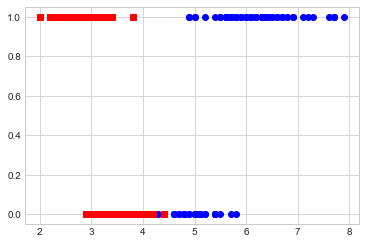

In [28]:
plt.plot(X[:,0],y,'bo')
plt.plot(X[:,1],y,'rs')


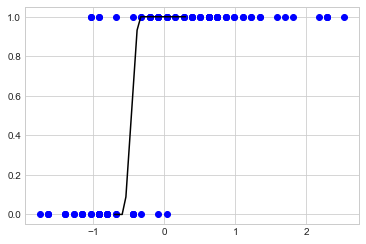

In [34]:
x_points = np.linspace(-0.7, 0.3, 20)
y_log_gd = x_points*theta[0]+theta[2] 
y_log_gd[y_log_gd>1]=1
y_log_gd[y_log_gd<0]=0
plt.plot(X_standard[:,0], y, 'bo')
plt.plot(x_points, y_log_gd, color= 'black')
plt.show()

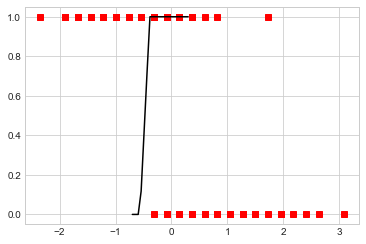

In [63]:
x_points = np.linspace(-0.7, 0.3, 20)
y_log_gd_1 = x_points*theta[0]+theta[2] 
y_log_gd_1[y_log_gd_1>1]=1
y_log_gd_1[y_log_gd_1<0]=0
plt.plot(X_standard[:,1], y, 'rs')
plt.plot(x_points, y_log_gd_1, color= 'black')
plt.show()


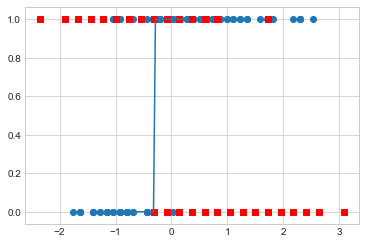

In [65]:
x_points = np.linspace(-0.7, 0.3, 30)
y_log_lr = x_points*lgr.coef_[0][0]+lgr.intercept_[0]
y_log_lr[y_log_lr>1]=1
y_log_lr[y_log_lr<0]=0
plt.scatter(X_standard[:,0], y)
plt.plot(X_standard[:,1], y, 'rs')
plt.plot(x_points, y_log_lr,)
plt.show()

In [57]:
X_test_standard = ((X_test-X_test.mean(axis=0))/X_test.std(axis=0))
ones_matrix_test = np.ones((np.asarray(X_test_standard).shape[0],1))
X_test_standard = np.append(X_test_standard , ones_matrix_test, axis=1)
#print(X_test_standard)
y_test = np.reshape(np.asarray(y_test), (np.asarray(y_test).shape[0], 1))
y_preds = X_test_standard.dot(theta)
y_preds[y_preds>0]=1
y_preds[y_preds<0]=0
#print(y_preds)
theta_lr = np.asarray(lgr.coef_)
print(theta_lr.shape)
y_preds_lr = X_test_standard.dot(theta_lr.T)
y_preds_lr[y_preds_lr>0]=1
y_preds_lr[y_preds_lr<0]=0
y_check = np.concatenate((y_test, y_preds, y_preds_lr), axis=1)
print(y_check)

(1, 3)
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [0. 0. 0.]
 [0. 0. 0.]
 [1. 1. 1.]
 [0. 0. 0.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [0. 1. 0.]
 [1. 1. 1.]
 [0. 0. 0.]
 [1. 1. 1.]
 [0. 0. 0.]
 [1. 1. 1.]
 [1. 1. 1.]
 [0. 0. 0.]
 [1. 0. 0.]
 [0. 0. 0.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [0. 0. 0.]
 [1. 1. 1.]
 [0. 0. 0.]
 [1. 1. 1.]
 [1. 1. 1.]
 [0. 0. 0.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [0. 0. 0.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [0. 0. 0.]
 [1. 1. 1.]
 [1. 1. 1.]
 [0. 0. 0.]]
